# BELOW IS HOW WE CAN COLLECT REAL-TIME STOCK MARKET DATA USING THE YFINANCE API


In [30]:
import pandas as pd
import yfinance as yf
from datetime import datetime

start_date = datetime.now() - pd.DateOffset(months=12)
end_date = datetime.now()

banks = ['ICICIBANK.NS','HDFCBANK.NS','KOTAKBANK.NS','SBIN.NS','AXISBANK.NS']

df_list = []

for bank in banks:
    data = yf.download(bank, start=start_date, end=end_date)
    df_list.append(data)

df = pd.concat(df_list, keys=banks, names=['bank', 'Date'])
df

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Open        High         Low       Close  \
bank         Date                                                         
ICICIBANK.NS 2022-09-07  878.549988  882.650024  872.500000  876.200012   
             2022-09-08  885.500000  900.799988  885.500000  898.799988   
             2022-09-09  910.150024  911.950012  897.700012  901.250000   
             2022-09-12  905.049988  908.900024  902.799988  907.200012   
             2022-09-13  913.950012  913.950012  905.299988  910.000000   
...                             ...         ...         ...         ...   
AXISBANK.NS  2023-08-31  981.799988  994.700012  968.599976  973.500000   
             2023-09-01  974.250000  993.000000  969.000000  991.150024   
             2023-09-04  993.750000  994.549988  980.000000  982.250000   
             2023-09-05  985.450012  986.200012  977.900024  981.450012   
             2023-09-06  981.450012  983.150024  961.799988  965.049988   

                          Adj Close    Volume  
bank         Date                              
ICICIBANK.NS 2022-09-07  861.920715   8814960  
             2022-09-08  884.152405  12163106  
             2022-09-09  886.562439   9936230  
             2022-09-12  892.415466   6016978  
             2022-09-13  895.169861  10400475  
...                             ...       ...  
AXISBANK.NS  2023-08-31  973.500000  21558300  
             2023-09-01  991.150024  10946742  
             2023-09-04  982.250000   6727188  
             2023-09-05  981.450012  10548660  
             2023-09-06  965.049988  16351052  

[1249 rows x 6 columns]

# RESET INDEX BEFORE MOVING FORWARD

In [31]:
df2=df.reset_index()
df2


,bank,Date,Open,High,Low,Close,Adj Close,Volume
0,ICICIBANK.NS,2022-09-07,878.549988,882.650024,872.500000,876.200012,861.920715,8814960
1,ICICIBANK.NS,2022-09-08,885.500000,900.799988,885.500000,898.799988,884.152405,12163106
2,ICICIBANK.NS,2022-09-09,910.150024,911.950012,897.700012,901.250000,886.562439,9936230
3,ICICIBANK.NS,2022-09-12,905.049988,908.900024,902.799988,907.200012,892.415466,6016978
4,ICICIBANK.NS,2022-09-13,913.950012,913.950012,905.299988,910.000000,895.169861,10400475
...,...,...,...,...,...,...,...,...
1244,AXISBANK.NS,2023-08-31,981.799988,994.700012,968.599976,973.500000,973.500000,21558300
1245,AXISBANK.NS,2023-09-01,974.250000,993.000000,969.000000,991.150024,991.150024,10946742
1246,AXISBANK.NS,2023-09-04,993.750000,994.549988,980.000000,982.250000,982.250000,6727188
1247,AXISBANK.NS,2023-09-05,985.450012,986.200012,977.900024,981.450012,981.450012,10548660


# THE PERFORMANCE IN THE STOCK MARKET OF ALL THE BANKS

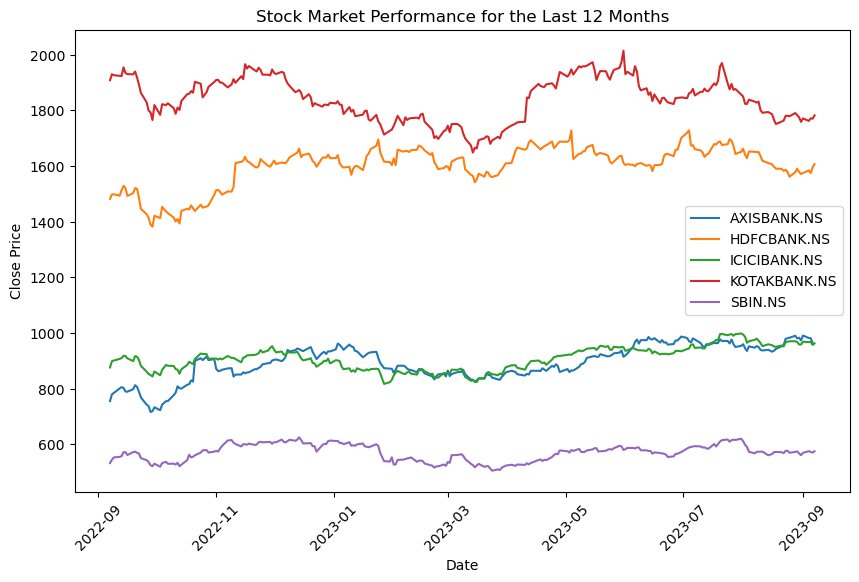

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots(figsize=(10, 6))

for bank, data in df2.groupby('bank'):
    ax.plot(data['Date'], data['Close'], label=bank)

ax.set_title("Stock Market Performance for the Last 12 Months")
ax.set_xlabel('Date')
ax.set_ylabel('Close Price')

ax.legend()
plt.xticks(rotation=45)
plt.show()


# THE FACETED AREA CHART, WHICH MAKES IT EASY TO COMPARE THE PERFORMANCE OF DIFFERENT BANKS.

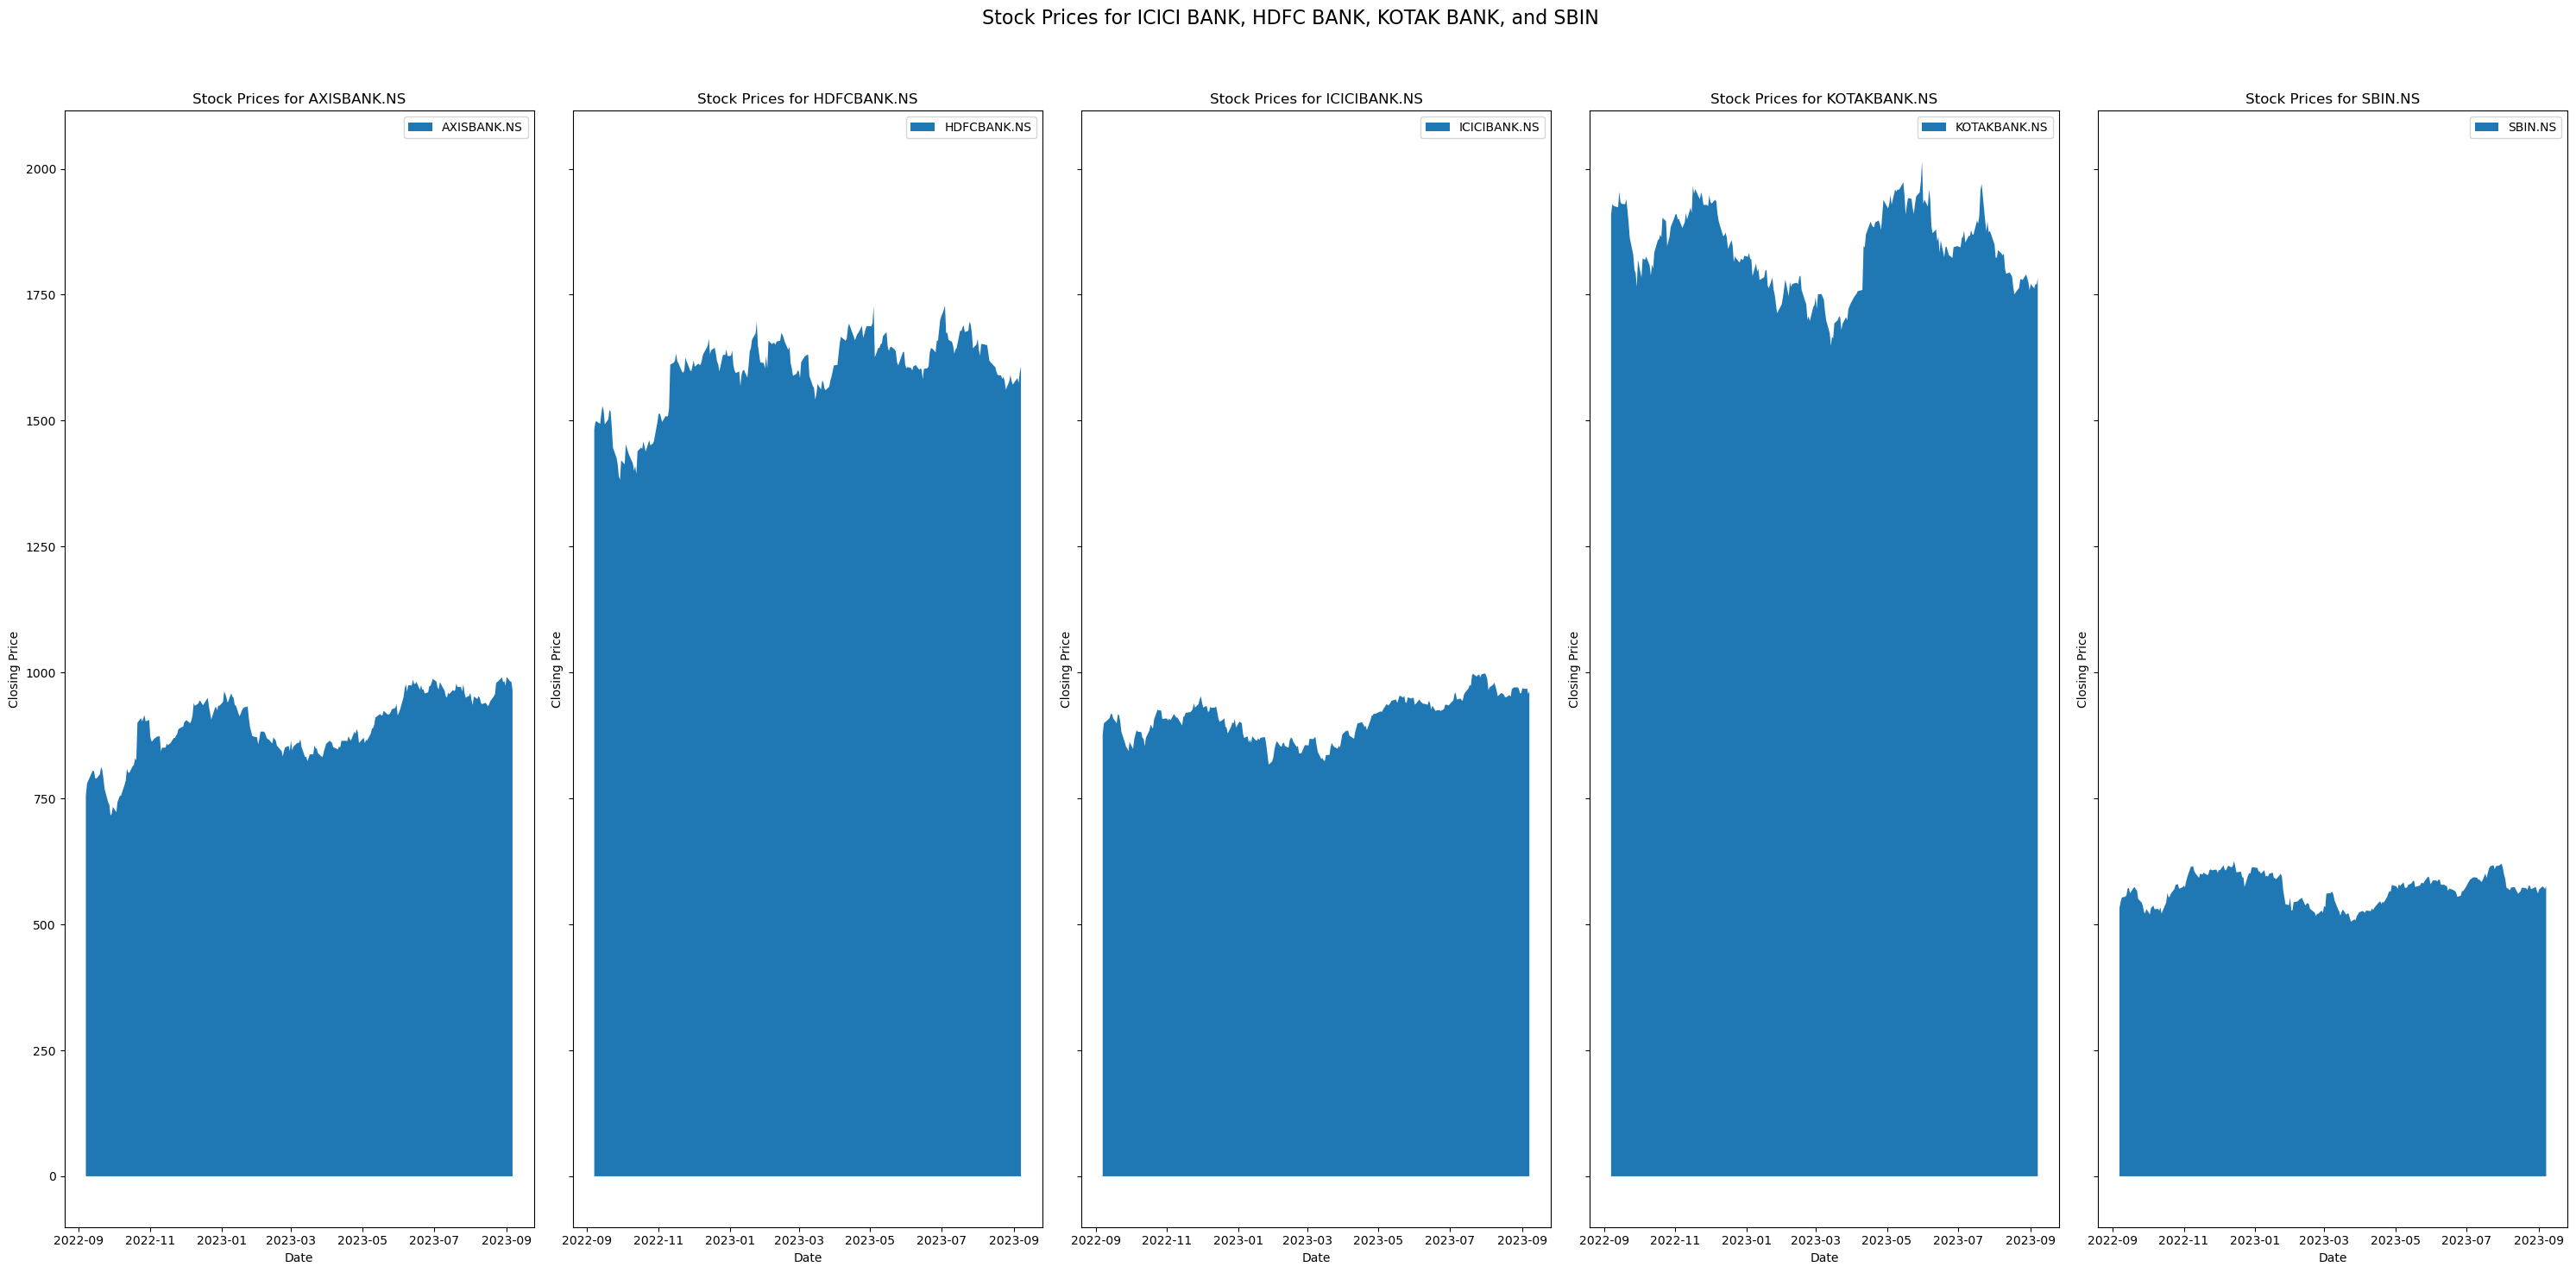

In [42]:
import matplotlib.pyplot as plt
import pandas as pd

fig, axes = plt.subplots(nrows=1, ncols=len(df2['bank'].unique()), figsize=(30,15), sharey=True)

for i, (bank, data) in enumerate(df2.groupby('bank')):
    ax = axes[i]
    ax.fill_between(data['Date'], data['Close'], label=bank)
    ax.set_title(f'Stock Prices for {bank}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Closing Price')
    ax.legend()

axes[0].set_ylabel('Closing Price')
plt.suptitle('Stock Prices for ICICI BANK, HDFC BANK, KOTAK BANK, and SBIN', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



# ANALYZING MOVING AVERAGES

In [38]:
df2['MA20'] = df2.groupby('bank')['Close'].rolling(window=20).mean().reset_index(0, drop=True)
df2['MA50'] = df2.groupby('bank')['Close'].rolling(window=50).mean().reset_index(0, drop=True)

for bank, group in df2.groupby('bank'):
    print(f'Moving Averages for {bank}')
    print(group[['MA20', 'MA50']])

Moving Averages for AXISBANK.NS
            MA20        MA50
1000         NaN         NaN
1001         NaN         NaN
1002         NaN         NaN
1003         NaN         NaN
1004         NaN         NaN
...          ...         ...
1244  957.437497  962.347001
1245  960.217499  962.850001
1246  961.717499  963.163002
1247  963.419998  963.624001
1248  964.027496  963.714001

[249 rows x 2 columns]
Moving Averages for HDFCBANK.NS
            MA20         MA50
250          NaN          NaN
251          NaN          NaN
252          NaN          NaN
253          NaN          NaN
254          NaN          NaN
..           ...          ...
495  1602.807495  1640.968997
496  1599.425000  1639.787998
497  1595.607501  1638.415999
498  1592.887500  1637.614998
499  1590.722498  1636.586997

[250 rows x 2 columns]
Moving Averages for ICICIBANK.NS
           MA20        MA50
0           NaN         NaN
1           NaN         NaN
2           NaN         NaN
3           NaN         NaN
4      

# VISUALIZE THE MOVING AVERAGES OF ALL BANKS

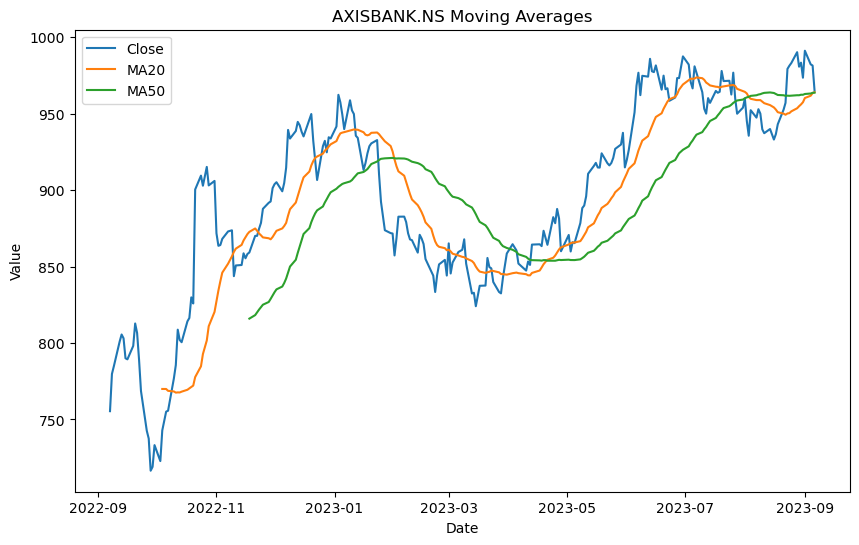

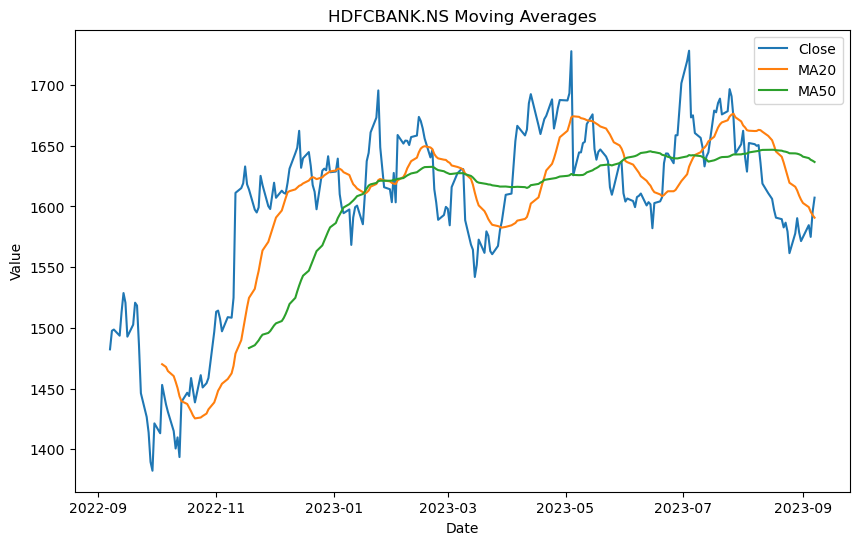

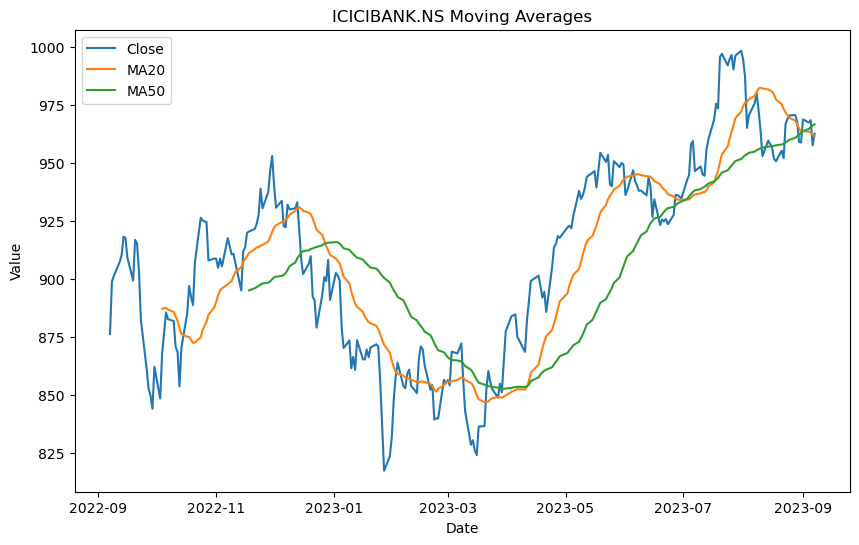

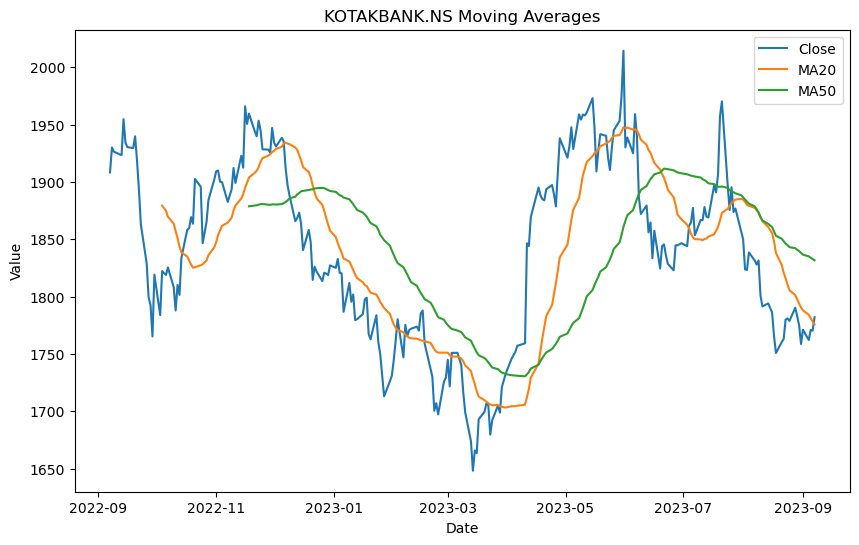

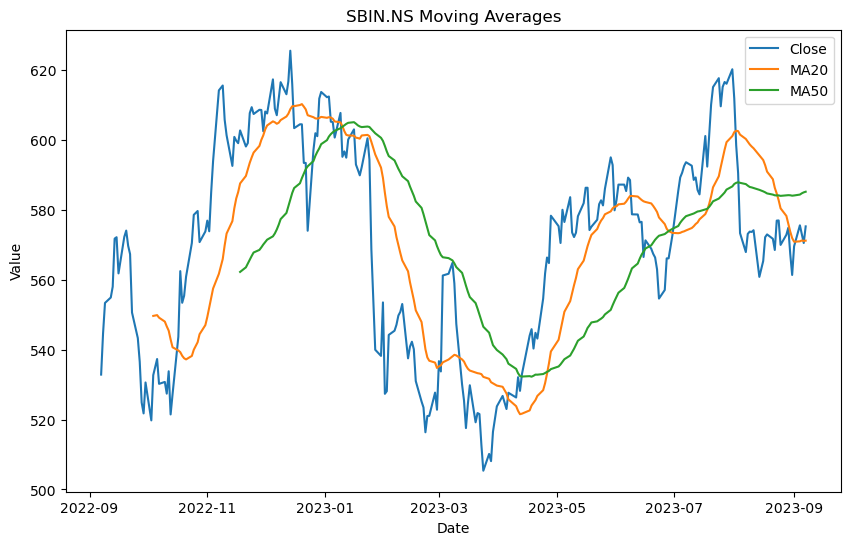

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

grouped = df2.groupby('bank')
for bank, group_data in grouped:
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.lineplot(data=group_data, x='Date', y='Close', label='Close', ax=ax)
    sns.lineplot(data=group_data, x='Date', y='MA20', label='MA20', ax=ax)
    sns.lineplot(data=group_data, x='Date', y='MA50', label='MA50', ax=ax)

    ax.set_title(f"{bank} Moving Averages")
    ax.set_xlabel('Date')
    ax.set_ylabel('Value')
    ax.legend()
    plt.show()


# VOLATILITY OF ALL BANKS

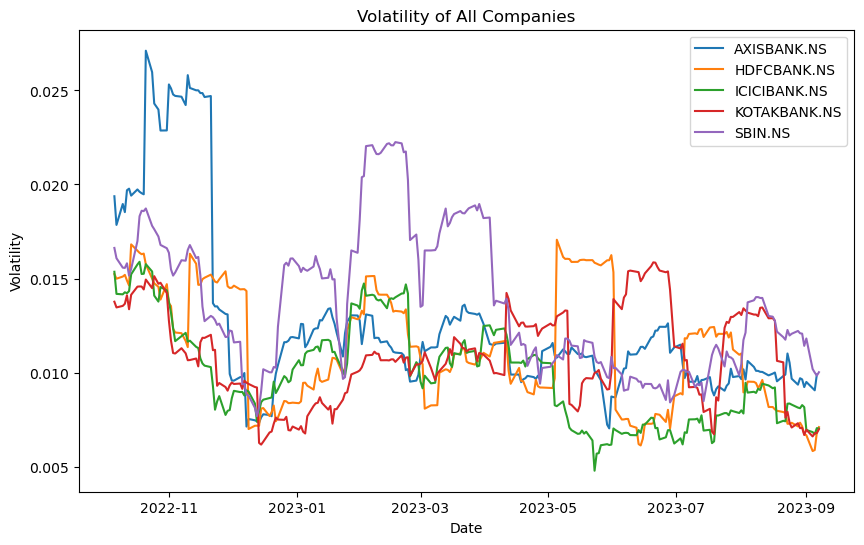

In [44]:
import matplotlib.pyplot as plt
import pandas as pd

df2['Volatility'] = df2.groupby('bank')['Close'].pct_change().rolling(window=20).std().reset_index(0, drop=True)
grouped = df2.groupby('bank')
fig, ax = plt.subplots(figsize=(10, 6))

for bank, group_data in grouped:
    ax.plot(group_data['Date'], group_data['Volatility'], label=bank)

ax.set_title('Volatility of All Companies')
ax.set_xlabel('Date')
ax.set_ylabel('Volatility')

ax.legend()
plt.show()


# THE CORRELATION BETWEEN THE STOCK PRICES OF AXISBANK AND ICICIBANK

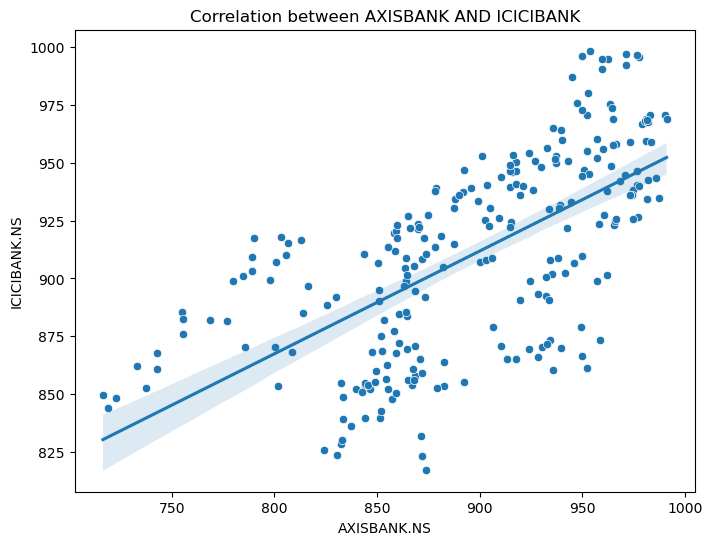

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
axis = df2.loc[df2['bank'] == 'AXISBANK.NS', ['Date', 'Close']].rename(columns={'Close': 'AXISBANK.NS'})
icici = df2.loc[df2['bank'] == 'ICICIBANK.NS', ['Date', 'Close']].rename(columns={'Close': 'ICICIBANK.NS'})

df2_corr = pd.merge(axis, icici, on='Date')
fig, ax = plt.subplots(figsize=(8, 6))

sns.scatterplot(data=df2_corr, x='AXISBANK.NS', y='ICICIBANK.NS', ax=ax)
sns.regplot(data=df2_corr, x='AXISBANK.NS', y='ICICIBANK.NS', ax=ax, scatter=False)
ax.set_title('Correlation between AXISBANK AND ICICIBANK')

plt.show()
